## 코로나 시각화 를 통한 인사이트 도출


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 필요한 라이브러리를 가져온다.
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
#경로 : '/content/drive/MyDrive/인공지능사관학교/빅데이터/별첨 2_DACON_코로나 데이터 분석/data'
import warnings 
warnings.filterwarnings('ignore') #성가신 경고는 무시 하는 필터링 

In [ ]:
pd.set_option("precision",2) #float을 소수점 2자리 까지 출력해 준다. 전체 옵션 


In [ ]:
#환자 정보 데이터 
pa_df = pd.read_csv('/content/drive/MyDrive/인공지능사관학교/빅데이터/별첨 2_DACON_코로나 데이터 분석/data/PatientInfo.csv')
pa_df.shape

(4004, 18)

In [ ]:
pa_df.head(5)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
pa_df.info() 
'''
수치형 데이터
patient_id  = 환자 아이디 
global_num
infection_order
나머지는 명목형 데이터 15개 가  
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          4004 non-null   int64  
 1   global_num          2806 non-null   float64
 2   sex                 3674 non-null   object 
 3   birth_year          3267 non-null   object 
 4   age                 3525 non-null   object 
 5   country             4004 non-null   object 
 6   province            4004 non-null   object 
 7   city                3926 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      3211 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         899 non-null    object 
 12  contact_number      680 non-null    object 
 13  symptom_onset_date  535 non-null    object 
 14  confirmed_date      4001 non-null   object 
 15  released_date       1508 non-null   object 
 16  deceas

'\n수치형 데이터\npatient_id  = 환자 아이디 \nglobal_num\ninfection_order\n나머지는 명목형 데이터 15개 가  \n'

##2.Search

In [ ]:
#환자 수 
pa_df.shape[0]
print("환자의 수 {}".format(pa_df.shape[0]))

환자의 수 4004


In [ ]:
#결측치 여부 
pa_df.isnull().sum().sum()

27910

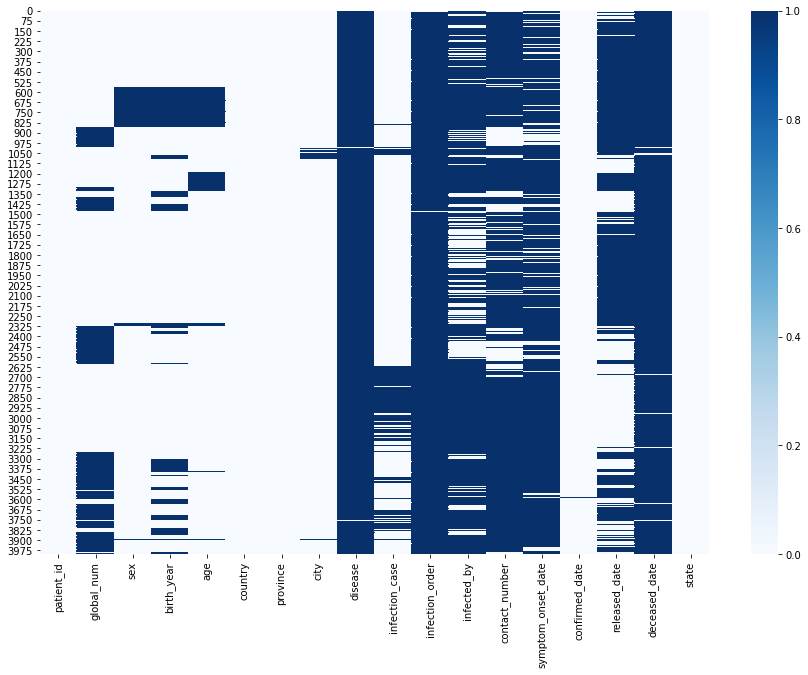

'\n결측치 가 많은 데이터는 사용하기 힘듬 \n\n'

In [ ]:
#결측치 시각화
plt.figure(figsize = (15,10))
sns.heatmap(pa_df.isnull(),cmap = 'Blues',cbar =True) #결측치는 파란 색으로 표시 seaborn.heatmap(감지 되는 부분, 표현하는 색깔 , 색깔의 깊이 를 나타내는 바)
plt.show()
'''
결측치 가 많은 데이터는 사용하기 힘듬 

'''

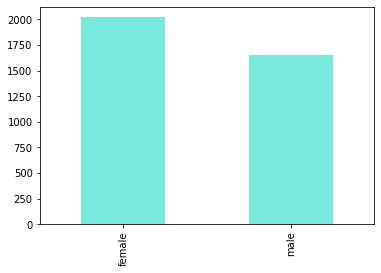

In [ ]:
#성별 집계 
sex_counts = pa_df.sex.value_counts() #성별 감염수 카운트 
sex_counts.sort_values(ascending=False) #값이 큰순서대로 정렬 = 내림차순
sex_counts.plot.bar(color = 'turquoise',alpha = 0.7) #여성이 코로나 감염자 가 더 많음 

pandas.core.series.Series

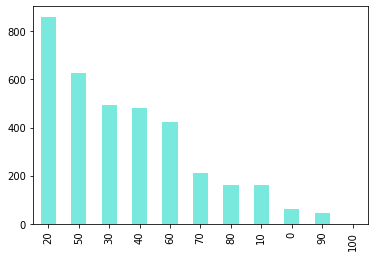

In [ ]:
#환자의 나이 
pa_df.age.unique() #나이는 0 ~ 100 까지 다양하게 있기 때문에 해당 unique 나이 만 출력
pa_df.age = pa_df.age.str.replace('s','',regex = True) #나이 에 s 문자를 빈 문자로 대체 

age_counts = pa_df.age.value_counts() #나이대 별 카운트
age_counts.sort_values(ascending= False) #값으로 정형 
age_counts.plot.bar(color = 'turquoise',alpha = 0.7) #20대가 많음  = 클럽 .. . pandas.plot.bar(색깔 , 투명도)
type(age_counts) 



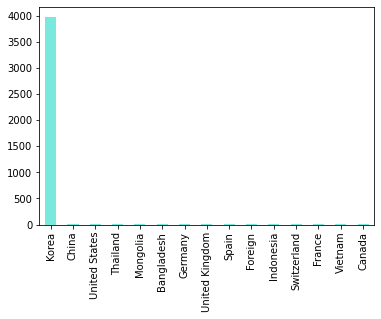

In [ ]:
#명목형 변수인 국적별 를 시각화 해본다 
pa_df.country.unique()
country_counts = pa_df.country.value_counts()
country_counts.sort_values(ascending = False)
country_counts.plot.bar(color = 'turquoise',alpha = 0.7)

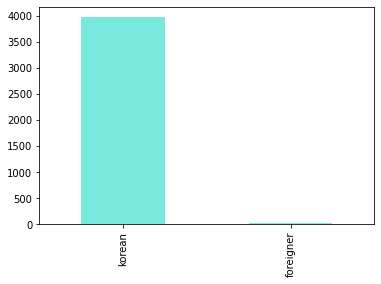

In [ ]:
pa_df.country.unique()
country_counts = (pa_df == 'Korea').country.value_counts() #국적 중에 한국 사람 인 수와 외국인의 수 카운트 
country_counts.sort_values(ascending = False) #값으로 정렬
country_counts.index = ['korean','foreigner']
country_counts.plot.bar(color = 'turquoise',alpha = 0.7) 

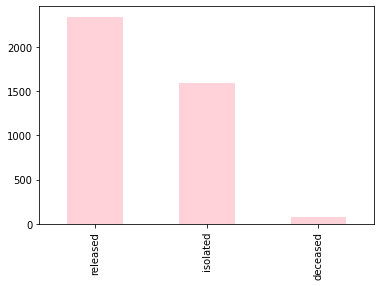

In [ ]:
#state
pa_df.state.unique()
state_count = pa_df.state.value_counts()
state_count.sort_values(ascending = False)
state_count.plot.bar(color = 'pink',alpha = 0.7)

In [ ]:
#기저 질환 (disease)
pa_df.disease.count() #결측치가 안나오는 수는 18개 분석 불가 


18

'\n경기도 가 가장 많은 환자를 보유 \n제주도 가 가장 적은 환자를 보유 \n이것은 인구수에 따른 환자 변화라고 생각 할수 있음\n'

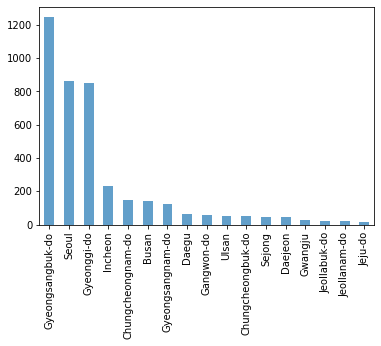

In [ ]:
#province data
pa_df.province
pa_df.province.unique()
province_counts = pa_df.province.value_counts()
province_counts.sort_values(ascending=False)
province_counts.plot.bar(alpha = 0.7)
'''
경기도 가 가장 많은 환자를 보유 
제주도 가 가장 적은 환자를 보유 
이것은 인구수에 따른 환자 변화라고 생각 할수 있음
'''

In [ ]:
'''#감염날짜 별 
print(pa_df.confirmed_date)
#월별로 분리 
pa_df['confirmed_date'] = pa_df['confirmed_date'].apply(lambda x : x[5:7])"""
'''

'#감염날짜 별 \nprint(pa_df.confirmed_date)\n#월별로 분리 \npa_df[\'confirmed_date\'] = pa_df[\'confirmed_date\'].apply(lambda x : x[5:7])"""\n'

##두개 이상 씩 조합


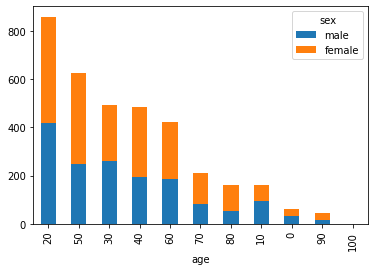

In [ ]:
#age 와 sex 의 조화 
pa_df.age , pa_df.sex
ct = pd.crosstab(pa_df.age,pa_df.sex) #연령대 별 성별 로 하여 
pd.crosstab(pa_df.sex,pa_df.age) #성별과 나이 별로 환자수를 데이터 프레임 형식으로 출력
ct['total'] = ct.male + ct.female #각 나이 대별 남성과 여성의 환자 수 의 합
ct.total
ct.sort_values(by = 'total',ascending = False) [['male','female']].plot.bar(stacked = True) #값별로 정렬 + stacked 남자 인원 쌓고 여자 인원을 데이터 로 보여줌 
'''
연령대 별 성별로 수를 시각화 
'''
plt.show()

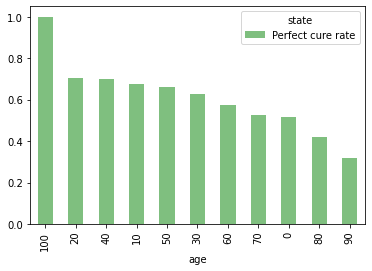

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3125,6001000503,7739.0,female,1916,100,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,Gyeongsan Seorin Nursing Home,NaN,NaN,NaN,NaN,2020-03-10,2020-05-15,NaN,released


In [ ]:
#완치율 
ct = pd.crosstab(pa_df.age,pa_df.state == 'released')
ct = ct.rename (columns = {False:'Not_released',True:'released'})
ct['Perfect cure rate'] = ct.released/(ct.Not_released + ct.released)
ct.sort_values(by=['Perfect cure rate'], ascending=False)[['Perfect cure rate']].plot.bar(color='green', alpha=0.5)
plt.show()
#plt.ylim(0,100)
ct
'''
100 살 이 사람 어떻게 퇴원했지
'''

pa_df[pa_df.age == '100'] #경상북도 경산시 에 살고 있는 1916 년 올해 나이 100세 할머니  확인

In [ ]:
pa_df.age
pa_df.state == 'deceased'

ct = pd.crosstab(pa_df.age,pa_df.state == 'deceased') #나이와 사망 을 가지고 탭을
ct.rename(columns = {False:'alive',True:'deceased'},inplace = True) #column 의 특정 이름만 바꾸고 싶을떄 사용 

ct.columns = ['alive','deceased']
ct

,alive,deceased
age,,
0,60,0
10,160,0
100,1,0
20,860,0
30,493,1
40,481,2
50,618,7
60,411,12
70,190,20


age
0      0.00e+00
10     0.00e+00
100    0.00e+00
20     0.00e+00
30     2.02e-03
40     4.14e-03
50     1.12e-02
60     2.84e-02
70     9.52e-02
80     1.54e-01
90     1.49e-01
Name: moltality, dtype: float64

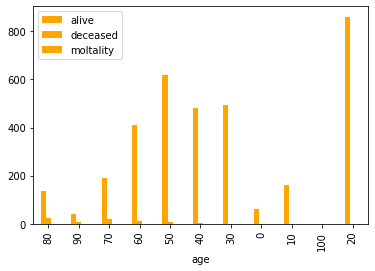

In [ ]:
#사망율 계산 
ct['moltality'] = ct.deceased/(ct.deceased + ct.alive)
ct.sort_values(by = 'moltality',ascending= False).plot.bar(color = 'orange')
ct.moltality

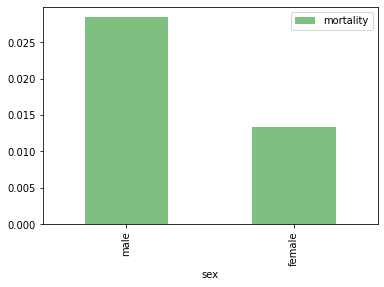

'\n사망율은 남자가 더 높다 \n감염 인원 수는 여자가 더 높고 \n'

In [ ]:
# Sex별 사망비율.
ct = pd.crosstab(pa_df.sex, pa_df.state=='deceased')
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)
ct.sort_values(by=['mortality'], ascending=False)[['mortality']].plot.bar(color='green', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()
'''
사망율은 남자가 더 높다 
감염 인원 수는 여자가 더 높고 
'''

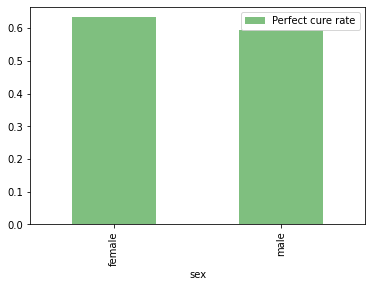

'\n완치 율도 여성이 높은 편으로 관찰 \n'

In [ ]:
#sex 별 완치율 
ct = pd.crosstab(pa_df.sex,pa_df.state =='released')
ct.columns = ['Not_released','released']
ct['Perfect cure rate'] = ct.released/(ct.Not_released + ct.released)


ct.sort_values(by=['Perfect cure rate'], ascending=False)[['Perfect cure rate']].plot.bar(color='green', alpha=0.5)
plt.show()
ct
'''
완치 율도 여성이 높은 편으로 관찰 
'''

In [ ]:
ct

,Not_released,released,Perfect cure rate
sex,,,
female,741,1280,0.63
male,672,981,0.59


##3.감염 경로 유형 

In [ ]:
#감염 경로 와 환자의 동선을 가지고 인사이트 도출하는것이 목표이다.
print(pa_df.infection_case.unique())
print(pa_df.infection_case.nunique()) #29 개의 감염 경로 

['overseas inflow' 'contact with patient' 'Seongdong-gu APT' 'etc'
 "Eunpyeong St. Mary's Hospital" 'Shincheonji Church' 'Dongan Church'
 'Guro-gu Call Center' nan 'Itaewon Clubs' 'Samsung Medical Center'
 'Coupang Logistics Center' 'Guri Collective Infection'
 'KB Life Insurance' 'Yeongdeungpo Learning Institute' 'Onchun Church'
 'Cheongdo Daenam Hospital' 'Suyeong-gu Kindergarten'
 'Ministry of Oceans and Fisheries' 'gym facility in Cheonan'
 'gym facility in Sejong' 'River of Grace Community Church'
 'Gyeongsan Seorin Nursing Home' 'Gyeongsan Cham Joeun Community Center'
 'Gyeongsan Jeil Silver Town' 'Bonghwa Pureun Nursing Home'
 'Pilgrimage to Israel' 'Milal Shelter' 'Geochang Church'
 'Changnyeong Coin Karaoke']
29


  infection_case  count
0        Unknown   1394
1     Individual   1182
2          Group    725
3       Overseas    703


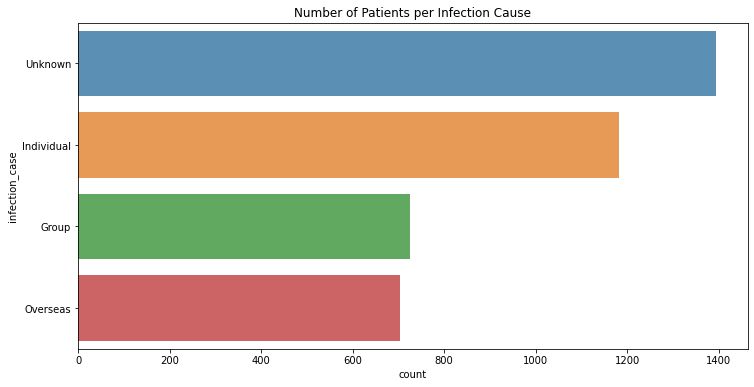

In [ ]:
# 다음과 같이 유형의 label을 바꾸어서 다시 집계 및 시각화 해본다.
# 'contact with patient' => 'Individual'     개인접촉
# 'etc'  or NaN         => 'Unknown'         모름
# 'overseas inflow'     => 'Overseas'        해외
#  나머지               => 'Group'            집단

case_dict = {'contact with patient':'Individual' , 'etc':'Unknown','overseas inflow':'Overseas'}

res = pa_df.infection_case.apply(lambda x : case_dict[x] if x in case_dict.keys() else 'Group' if not pd.isnull(x) else 'Unknown') 

pa_df['infection_case'] = res

res = res.value_counts().sort_values(ascending = False)
res = res.reset_index() #인덱싱 재배열
res.rename(columns = {'index':'infection_case','infection_case':'count'},inplace = True)
print(res)
plt.figure(figsize = (12,6))
sns.barplot(y = 'infection_case',x = 'count',data = res, alpha = 0.8)
plt.title('Number of Patients per Infection Cause')
plt.show()

In [ ]:
'''#걈염 경로 별 환자수 집계 하여 시각화 한다.
res1 = pa_df.groupby(['infection_case'])['patient_id'].count()
res1 #감염 경로 별 환자수 가 나온다 
res1.sort_values()
res1 = res1.reset_index() #index 을 데이터 프레임의 칼람으로 그림 
res1.columns = ['infection_case' ,'count'] #이걸로 바꿀려면 전체 컬럼을 바꿔줘야 한다
res1.rename(columns = {'infection_case':'infection case' , 'patient_id':'count'},inplace = True)
res1 = res1.sort_values(by = 'count',ascending= False)
plt.figure(figsize=(12,6))
sns.barplot(data = res1,x = 'count',y = 'infection case')
plt.show()
'''


"#걈염 경로 별 환자수 집계 하여 시각화 한다.\nres1 = pa_df.groupby(['infection_case'])['patient_id'].count()\nres1 #감염 경로 별 환자수 가 나온다 \nres1.sort_values()\nres1 = res1.reset_index() #index 을 데이터 프레임의 칼람으로 그림 \nres1.columns = ['infection_case' ,'count'] #이걸로 바꿀려면 전체 컬럼을 바꿔줘야 한다\nres1.rename(columns = {'infection_case':'infection case' , 'patient_id':'count'},inplace = True)\nres1 = res1.sort_values(by = 'count',ascending= False)\nplt.figure(figsize=(12,6))\nsns.barplot(data = res1,x = 'count',y = 'infection case')\nplt.show()\n"

In [ ]:
# 다음과 같이 유형의 label을 바꾸어서 다시 집계 및 시각화 해본다.
# 'contact with patient' => 'Individual'     개인접촉
# 'etc'  or NaN         => 'Unknown'         모름
# 'overseas inflow'     => 'Overseas'        해외
#  나머지               => 'Group'            집단

pa_dict = {'contact with patient':'Individual', 'etc':'Unknown', 'overseas inflow': 'Overseas'}

In [ ]:
def my_coversion_func(x):
  if not pd.isnull(x): #결측치 일때
    if x in pa_dict: #유형 일떄
      return pa_dict[x]
    else:
      return 'Group'
  else:
    return 'Unknown'

In [ ]:
#pa_df.infection_case.apply(my_coversion_func) #29 가지의 데이터 유형을 큰 4가지로 반환 하여 보여줌 

In [ ]:
#res = pa_df.infection_case.apply(lambda x: pa_dict[x] if x in pa_dict.keys() else 'Group' if not pd.isnull(x) else 'Unknown') 
#pa_df['infection_case'] = res

##4. 유동성

In [ ]:
#동선 데이터 
df2 = pd.read_csv('/content/drive/MyDrive/인공지능사관학교/빅데이터/별첨 2_DACON_코로나 데이터 분석/data/PatientRoute.csv')
df2.shape

(8092, 8)

In [ ]:
#결측치 확인 
df2.isnull().sum().sum()

3264

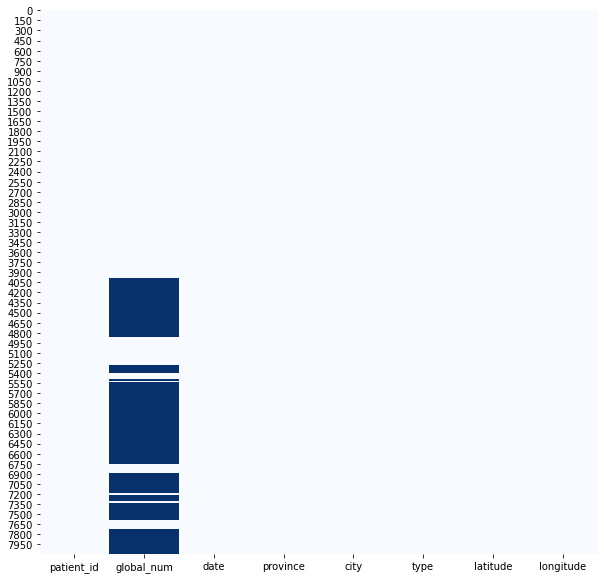

In [ ]:
# 결측치를 시각화 해본다.
plt.figure(figsize = (10,10))                                       # figsize=(가로, 세로) 크기.
sns.heatmap(df2.isnull(), cmap='Blues', cbar=False)
plt.show()

In [ ]:
df2.patient_id.nunique() #고유한 환자의 수 

1472

In [ ]:
#이동 경로 유형
df2.type.unique()

array(['airport', 'hospital', 'etc', 'store', 'public_transportation',
       'restaurant', 'church', 'beauty_salon', 'pharmacy', 'pc_cafe',
       'bank', 'academy', 'cafe', 'bakery', 'bar', 'gym', 'school',
       'real_estate_agency', 'karaoke', 'post_office', 'gas_station',
       'park', 'lodging', 'university', 'administrative_area_level_1'],
      dtype=object)

In [ ]:
#이동 경로 유형의 가지수 
df2.type.nunique()

25

In [ ]:
# 이동 경로의 유형을 카테고리로 표현해 본다.
leisure = ['library', 'theater', 'cafe', 'bakery', 'beauty_salon',
          'pc_cafe', 'billiards','restaurant', 'bar', 'karaoke']
travel = ['airport', 'lodging']
essential_edu = ['primary_school', 'school', 'university']
non_essential_edu = ['academy']
exercise = ['gym', 'mountain', 'park']
essential_admin = ['administrative_area_level_1', 'governmnet_office', 'post_office']
non_essential_admin = ['police_office', 'bank', 'real_estate_agency']
necessity = ['store', 'public_transportation', 'gas_station']
medical = ['hospital', 'pharmacy']
church = ['church']
etc = ['etc']

In [ ]:
#필수적 카테고리 묶기 
essential  = essential_edu + essential_admin + necessity + medical 
essential #필수 적인 동선 

['primary_school',
 'school',
 'university',
 'administrative_area_level_1',
 'governmnet_office',
 'post_office',
 'store',
 'public_transportation',
 'gas_station',
 'hospital',
 'pharmacy']

In [ ]:
# 필수/부수적 여부 변수 'is_essential' 파생변수로 추가.
def isessential(x):     
    if x in essential: #list 안에 있으면 true 
        res = True
    else:             #아니면 false
        res = False 
    return res
df2['is_essential'] = df2['type'].apply(lambda x: isessential(x)) #함수를 사용하여 바로 표시  

# 데이터 프레임 간추리기.
df2 = df2[['patient_id', 'type', 'is_essential']]
df2.head()

,patient_id,type,is_essential
0,1000000001,airport,False
1,1000000001,hospital,True
2,1000000002,etc,False
3,1000000002,store,True
4,1000000002,public_transportation,True


In [ ]:
# 집계 대상
df2['route_value'] = 1 #필수적인 부분 방문 했냐 안했냐를 카운팅 해주는 변수 초기값 전부 1로 초기화 
df2

,patient_id,type,is_essential,route_value
0,1000000001,airport,False,1
1,1000000001,hospital,True,1
2,1000000002,etc,False,1
3,1000000002,store,True,1
4,1000000002,public_transportation,True,1
...,...,...,...,...
8087,6100000090,airport,False,1
8088,6100000090,airport,False,1
8089,6100000090,store,True,1
8090,6100000090,hospital,True,1


In [ ]:
df3 = pd.pivot_table(data = df2 , index = "patient_id",columns = "is_essential",values = "route_value",aggfunc = "sum",fill_value = 0) #중복 되지 않게 환자의 동선을 필수 적인 곳과 아닌곳의 카운트 를 한다 
df3.head()

is_essential,False,True
patient_id,,
1000000001,1,1
1000000002,4,9
1000000003,2,0
1000000004,0,1
1000000005,0,1


In [ ]:
df3.columns.name = None
df3

,False,True
patient_id,,
1000000001,1,1
1000000002,4,9
1000000003,2,0
1000000004,0,1
1000000005,0,1
...,...,...
6100000086,2,2
6100000087,2,6
6100000088,19,5


In [ ]:
df3 = df3.reset_index()

In [ ]:
df3 = df3.rename(columns = {False:'Not_essential',True:'essential'})

In [ ]:
df_join = pd.merge(pa_df,df3 , on = "patient_id",how = "inner")

In [ ]:
df_join

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,Not_essential,essential
0,1000000001,2.0,male,1964,50,Korea,Seoul,Gangseo-gu,NaN,Overseas,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1,1
1,1000000002,5.0,male,1987,30,Korea,Seoul,Jungnang-gu,NaN,Overseas,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,4,9
2,1000000003,6.0,male,1964,50,Korea,Seoul,Jongno-gu,NaN,Individual,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,2,0
3,1000000004,7.0,male,1991,20,Korea,Seoul,Mapo-gu,NaN,Overseas,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,0,1
4,1000000005,9.0,female,1992,20,Korea,Seoul,Seongbuk-gu,NaN,Individual,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,6100000086,NaN,male,1966,50,Korea,Gyeongsangnam-do,Changwon-si,NaN,Unknown,NaN,NaN,NaN,2020-03-15,2020-03-19,NaN,NaN,isolated,2,2
1468,6100000087,NaN,female,1967,50,Korea,Gyeongsangnam-do,Changwon-si,NaN,Unknown,NaN,NaN,NaN,2020-03-16,2020-03-21,NaN,NaN,isolated,2,6
1469,6100000088,NaN,male,1994,20,Korea,Gyeongsangnam-do,Changwon-si,NaN,Unknown,NaN,NaN,NaN,2020-03-06,2020-03-22,2020-04-19,NaN,released,19,5
1470,6100000089,NaN,male,1960,60,Korea,Gyeongsangnam-do,Haman-gun,NaN,Unknown,NaN,6002000035,NaN,2020-03-22,2020-03-23,NaN,NaN,released,1,1


In [ ]:
len(pa_df),len(df3) #동선에 관련한 환자의 유형을 분류 한것이다 .

(4004, 1472)

## 5.접촉 빈도 



In [ ]:
res = df_join.contact_number
'''
말도 안되는 크기 데이터 와 
- 데이터 는 없어 야 한다 
'''

'\n말도 안되는 크기 데이터 와 \n- 데이터 는 없어 야 한다 \n'

In [ ]:
df_join = df_join[~res.isnull() & (res != '-')] #결측치 가 아니고 - 가 아닌것을 뺀 나머지 데이터

In [ ]:
df_join.contact_number.unique()

array(['75', '31', '17', '9', '2', '43', '0', '68', '6', '23', '117',
       '27', '8', '3', '1', '1000000772', '1000000796', '1091', '131',
       '16', '14', '4', '19', '296', '15', '34', '37', '22', '7', '10',
       '28', '21', '5', '25', '18', '11', '30', '41', '71', '38', '13',
       '24', '185', '160', '1160', '450', '65', '156', '39', '47', '86',
       '74', '12', '40', '95', '290', '32', '45', '35', '51', '130', '53',
       '106', '174', '78', '89', '113'], dtype=object)

In [ ]:
df_join['contact_number'] = df_join.contact_number.astype(int)

In [ ]:
df_join = df_join[df_join.contact_number < 10000] #이상치 없애기 
df_join.contact_number.unique()

array([  75,   31,   17,    9,    2,   43,    0,   68,    6,   23,  117,
         27,    8,    3,    1, 1091,  131,   16,   14,    4,   19,  296,
         15,   34,   37,   22,    7,   10,   28,   21,    5,   25,   18,
         11,   30,   41,   71,   38,   13,   24,  185,  160, 1160,  450,
         65,  156,   39,   47,   86,   74,   12,   40,   95,  290,   32,
         45,   35,   51,  130,   53,  106,  174,   78,   89,  113])

In [ ]:
df_join[df_join.contact_number == df_join.contact_number.max()]


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,Not_essential,essential
901,1200000031,31.0,female,1959,60,Korea,Daegu,NaN,NaN,Group,NaN,NaN,1160,NaN,2020-02-18,NaN,NaN,isolated,5,11


(array([298.,  39.,   6.,   7.,   3.,   4.,   2.,   2.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([   0. ,   23.2,   46.4,   69.6,   92.8,  116. ,  139.2,  162.4,
         185.6,  208.8,  232. ,  255.2,  278.4,  301.6,  324.8,  348. ,
         371.2,  394.4,  417.6,  440.8,  464. ,  487.2,  510.4,  533.6,
         556.8,  580. ,  603.2,  626.4,  649.6,  672.8,  696. ,  719.2,
         742.4,  765.6,  788.8,  812. ,  835.2,  858.4,  881.6,  904.8,
         928. ,  951.2,  974.4,  997.6, 1020.8, 1044. , 1067.2, 1090.4,
        1113.6, 1136.8, 1160. ]),
 <a list of 50 Patch objects>)

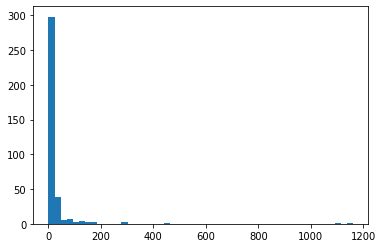

In [ ]:
plt.hist(df_join.contact_number,bins = 50)


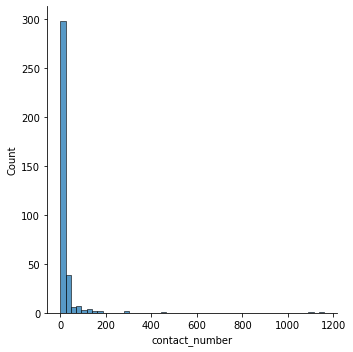

In [ ]:
sns.displot(df_join.contact_number,bins = 50)

##6.군집화

In [ ]:
df_4 = df_join[['patient_id','contact_number','essential','Not_essential','infection_case']]
df_4

,patient_id,contact_number,essential,Not_essential,infection_case
0,1000000001,75,1,1,Overseas
1,1000000002,31,9,4,Overseas
2,1000000003,17,0,2,Individual
3,1000000004,9,1,0,Overseas
4,1000000005,2,1,0,Individual
...,...,...,...,...,...
1242,6001000045,4,4,0,Unknown
1244,6001000061,2,1,3,Unknown
1246,6001000063,1,1,0,Unknown
1317,6014000001,11,1,4,Unknown


In [ ]:
df_4 = df_4.join(pd.get_dummies(df_4.infection_case,prefix = "infection",drop_first = False)) #one_hot encoding
df_final = df_4[['patient_id','contact_number','essential','Not_essential','infection_Group','infection_Individual','infection_Overseas','infection_Unknown']]



In [ ]:
df_final

,patient_id,contact_number,essential,Not_essential,infection_Group,infection_Individual,infection_Overseas,infection_Unknown
0,1000000001,75,1,1,0,0,1,0
1,1000000002,31,9,4,0,0,1,0
2,1000000003,17,0,2,0,1,0,0
3,1000000004,9,1,0,0,0,1,0
4,1000000005,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1242,6001000045,4,4,0,0,0,0,1
1244,6001000061,2,1,3,0,0,0,1
1246,6001000063,1,1,0,0,0,0,1
1317,6014000001,11,1,4,0,0,0,1


In [ ]:
X = df_final.values
my_scaler = StandardScaler()

In [ ]:
#표준화 
X = my_scaler.fit_transform(X)



In [ ]:
pd.DataFrame(X,columns = df_final.columns)

,patient_id,contact_number,essential,Not_essential,infection_Group,infection_Individual,infection_Overseas,infection_Unknown
0,-0.94,0.56,-0.75,-0.52,-0.55,-0.79,2.07,-0.49
1,-0.94,0.08,2.21,0.09,-0.55,-0.79,2.07,-0.49
2,-0.94,-0.07,-1.12,-0.31,-0.55,1.26,-0.48,-0.49
3,-0.94,-0.16,-0.75,-0.72,-0.55,-0.79,2.07,-0.49
4,-0.94,-0.24,-0.75,-0.72,-0.55,1.26,-0.48,-0.49
...,...,...,...,...,...,...,...,...
361,2.00,-0.21,0.36,-0.72,-0.55,-0.79,-0.48,2.02
362,2.00,-0.24,-0.75,-0.11,-0.55,-0.79,-0.48,2.02
363,2.00,-0.25,-0.75,-0.72,-0.55,-0.79,-0.48,2.02
364,2.00,-0.14,-0.75,0.09,-0.55,-0.79,-0.48,2.02


In [ ]:
#kmeans 군집화 
kmean = KMeans(n_clusters= 4 ,random_state = 123)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
#결과 보기 
my_centroids = kmean.cluster_centers_
my_label = kmean.labels_

NameError: ignored

##7.PCA(주성분 분석)

In [ ]:
my_pca = PCA(n_components=2) #차원 특성이 많아서 차원을 줄여야 한다  2차원 평면으로 바꾼다 
transforemed_comps = my_pca_fit_transform(X)
df_tran